In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/drive/MyDrive/CSE587/wpbc_data_3.csv")

In [4]:
df.head()

,id,diagnosis,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,...,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,...,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [5]:
df.shape

(198, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       198 non-null    int64  
 1   diagnosis                198 non-null    object 
 2   time_for_recurrence      198 non-null    int64  
 3   radius_mean              198 non-null    float64
 4   texture_mean             198 non-null    float64
 5   perimeter_mean           198 non-null    float64
 6   area_mean                198 non-null    float64
 7   smoothness_mean          198 non-null    float64
 8   compactness_mean         198 non-null    float64
 9   concavity_mean           198 non-null    float64
 10  concave points_mean      198 non-null    float64
 11  symmetry_mean            198 non-null    float64
 12  fractal_dimension_mean   198 non-null    float64
 13  radius_se                198 non-null    float64
 14  texture_se               1

In [7]:
df['lymph_node_status'].replace('?',0, inplace = True)

In [9]:
df.isna().sum()

id                         0
diagnosis                  0
time_for_recurrence        0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
tumor_size                 0
lymph_node_sta

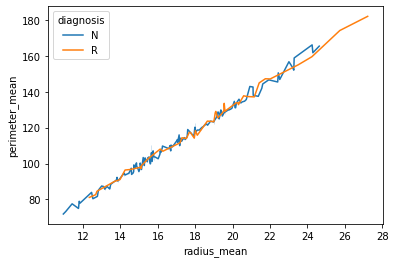

In [10]:
sns.lineplot(x=df["radius_mean"],y=df["perimeter_mean"], hue=df["diagnosis"])

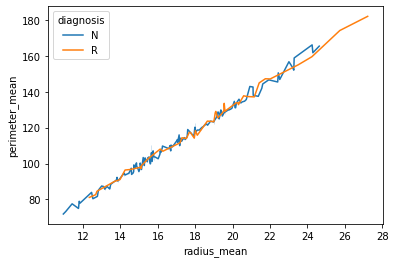

In [13]:
##Trying out differenet paramters

sns.lineplot(x=df["radius_mean"],y=df["perimeter_mean"], hue=df["diagnosis"])

In [ ]:
sns.countplot(df['diagnosis'])

In [17]:
#sns.barplot(df['diagnosis'],df['area_mean'])

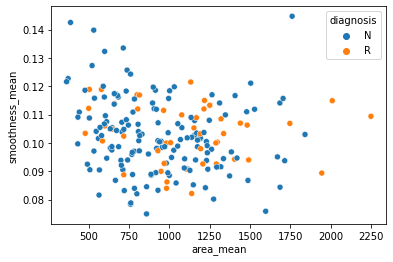

In [18]:
sns.scatterplot(x = df['area_mean'],y= df['smoothness_mean'],hue=df['diagnosis'])

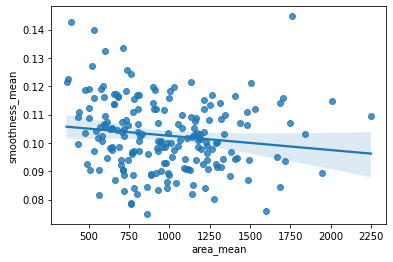

In [19]:
sns.regplot(x = df['area_mean'],y= df['smoothness_mean'])

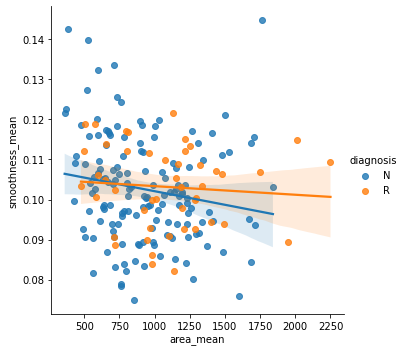

In [20]:
sns.lmplot(x='area_mean',y='smoothness_mean',hue='diagnosis',data=df)

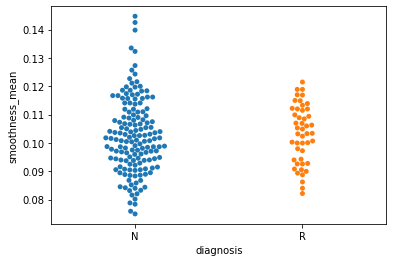

In [23]:
sns.swarmplot(x=df['diagnosis'],y=df['smoothness_mean'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


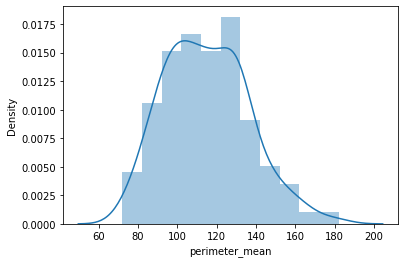

In [25]:
sns.distplot(df['perimeter_mean'])

In [ ]:
sns.distplot(df['smoothness_mean'])

In [ ]:
sns.jointplot(df['perimeter_mean'],df['smoothness_mean'],kind='kde')

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [63]:
from sklearn.svm import SVC


In [64]:
X = df.drop(['id','diagnosis'],axis=1)
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=349)

In [65]:
X_train

,time_for_recurrence,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,tumor_size,lymph_node_status
97,63,17.05,19.08,113.40,895.0,0.11410,0.1572,0.19100,0.10900,0.2131,...,133.5,1189.0,0.1703,0.39340,0.5018,0.25430,0.3109,0.09061,1.5,5
161,7,24.24,18.74,159.60,1945.0,0.08938,0.1136,0.17270,0.10710,0.1591,...,232.2,3903.0,0.1154,0.17720,0.2917,0.17950,0.2336,0.06259,3.0,4
150,16,17.75,28.03,117.30,981.6,0.09997,0.1314,0.16980,0.08293,0.1713,...,145.4,1437.0,0.1401,0.37620,0.6399,0.19700,0.2972,0.09075,1.5,7
148,13,17.27,25.42,112.40,928.8,0.08331,0.1109,0.12040,0.05736,0.1467,...,132.8,1284.0,0.1436,0.41220,0.5036,0.17390,0.2500,0.07944,9.0,0
185,17,13.63,24.70,89.65,569.2,0.10550,0.1312,0.11610,0.06403,0.1791,...,107.7,712.2,0.1554,0.35150,0.3409,0.16890,0.2739,0.09945,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,13,15.60,26.79,99.85,760.0,0.07885,0.0524,0.03778,0.02876,0.1580,...,117.2,1027.0,0.1097,0.09745,0.1263,0.08222,0.2805,0.06378,2.0,2
31,76,13.48,20.82,88.40,559.2,0.10160,0.1255,0.10630,0.05439,0.1720,...,107.3,740.4,0.1610,0.42250,0.5030,0.22580,0.2807,0.10710,2.5,0
47,97,19.55,15.49,128.00,1156.0,0.10790,0.1747,0.23520,0.11960,0.2616,...,153.4,1633.0,0.1534,0.33910,0.5819,0.22000,0.4714,0.09721,3.0,0
42,34,14.25,22.15,96.42,645.7,0.10490,0.2008,0.21350,0.08653,0.1949,...,119.1,959.5,0.1640,0.62470,0.6922,0.17850,0.2844,0.11320,1.5,0


In [66]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [67]:
model = [["LogisticRegression",LogisticRegression()],["RandomForestClassifier",RandomForestClassifier()],["DecisionTreeClassifier",DecisionTreeClassifier()],["GaussianNB",GaussianNB()],["KNeighborsClassifier",KNeighborsClassifier()],["Support Vector Machine",SVC()]]

In [68]:
X_train

array([[ 0.4781177 , -0.16313008, -0.77845124, ...,  0.00486266,
        -0.72598309,  0.35025403],
       [-1.17507854,  2.19018375, -0.85910694, ..., -1.32771873,
         0.08023204,  0.16144522],
       [-0.90938629,  0.06598253,  1.34469136, ...,  0.01152081,
        -0.72598309,  0.72787166],
       ...,
       [ 1.48184399,  0.65512925, -1.6300805 , ...,  0.31874692,
         0.08023204, -0.59379004],
       [-0.37800178, -1.07958052, -0.05017774, ...,  1.07920289,
        -0.72598309, -0.59379004],
       [-1.2045999 ,  0.73695518, -0.451084  , ..., -1.0556857 ,
        -0.40349704, -0.21617241]])

In [69]:
X_test

array([[ 0.21242545,  1.01189032, -1.1888464 , ..., -0.94915528,
         0.61770879, -0.59379004],
       [ 0.74380995, -1.01411978, -0.50801743, ...,  0.51326005,
        -0.72598309, -0.59379004],
       [ 0.62572451, -0.39551573, -0.36805608, ...,  0.43954481,
        -0.99472146, -0.40498123],
       ...,
       [ 0.24194681, -0.08457718, -0.22097804, ..., -0.71611999,
        -0.72598309, -0.40498123],
       [ 0.00577592,  0.41619753, -0.09287782, ..., -0.35039726,
        -0.99472146, -0.59379004],
       [ 1.51136535, -0.68354301, -2.484082  , ...,  0.49899258,
        -0.56474006, -0.40498123]])

In [70]:
accuracy_score1 = []
for i in model:
    uchiha = i[1]
    uchiha.fit(X_train,y_train)
    predict = uchiha.predict(X_test)
    accuracy_score1.append([i[0], accuracy_score(predict,y_test)])

In [71]:
main_score = pd.DataFrame(accuracy_score1)
main_score.columns = ["Model","Score"]

In [72]:
main_score

,Model,Score
0,LogisticRegression,0.800000
1,RandomForestClassifier,0.816667
2,DecisionTreeClassifier,0.700000
3,GaussianNB,0.666667
4,KNeighborsClassifier,0.800000
5,Support Vector Machine,0.750000


In [ ]:
xgboost
catboost
adaboost
neuralnet (FNN)